In [1]:
from quantileRegression import quantileRegression
import numpy as np

Welcome to ROOTaaS 6.06/02


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR"]

# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list

In [3]:
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]
print "Number of quantiles ", len(quantiles)

Number of quantiles  9


In [4]:
# Initialize the quantile regression object for mc
qr_mc = quantileRegression("mc")

In [5]:
# This is what you want to correct
print "Load the mc dataframe"
startEvtmc = 2000001 
stopEvtmc  = 3000000
qr_mc.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v1_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYToEE_powheg_13TeV_EBHighR9", "DYToEE_powheg_13TeV_EBLowR9", "DYToEE_powheg_13TeV_EEHighR9", "DYToEE_powheg_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)

Load the mc dataframe
NT branches: 
['rho', 'nvtx', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR']
Reading trees
Number of events  
rho                          2393830
nvtx                         2393830
leadPt                       2393830
leadScEta                    2393830
leadPhi                      2393830
leadR9                       2393830
leadS4                       2393830
leadSigmaIeIe                2393830
leadEtaWidth                 2393830
leadPhiWidth                 2393830
leadCovarianceIphiIphi       2393830
leadSigmaRR                  2393830
subleadPt                    2393830
subleadScEta                 2393830
subleadPhi                   2393830
subleadR9                    2393830
suble

In [6]:
#print "Get the corrected data-mc values"
qr_mc.correctAllY(X, ylist, quantiles )

This will take a while...
Loading mc weights for  R9
Loading data weights for  R9
Correcting  R9
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9
Loading mc weights for  S4
Loading data weights for  S4
Correcting  S4
Get corrections for  S4  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  S4
Loading mc weights for  SigmaIeIe
Loading data weights for  SigmaIeIe
Correcting  SigmaIeIe
Get corrections for  SigmaIeIe  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  SigmaIeIe
Loading mc weights for  EtaWidth
Loading data weights for  EtaWidth
Correcting  EtaWidth
Get corrections for  EtaWidth  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  EtaWidth
Loading mc weights for  PhiWidth


In [7]:
dfmc = qr_mc.getDF()
#print dfmc

In [8]:
# now get the data
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = -1
print "Load the data dataframe"
qr_data.loadDF("/Users/mauro/CMS/Physics/dataMC/nt/double_ele_spring16v2_sync_v1_ichep/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata)

Load the data dataframe
NT branches: 
['rho', 'nvtx', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR']
Reading trees
Number of events  
rho                                    1037409
nvtx                                   1037409
leadHLT_Ele27_WPTight_Gsf_vMatch       1037409
subleadHLT_Ele27_WPTight_Gsf_vMatch    1037409
leadPt                                 1037409
leadScEta                              1037409
leadPhi                                1037409
leadR9                                 1037409
leadS4                                 1037409
leadSigmaIeIe                          1037409
leadEtaWidth                           1037409
lea

In [9]:
dfdata = qr_data.getDF()
#print dfdata

In [10]:
dfmcNOcorr = dfmc[['index', 'rho', 'nvtx', 'Pt', 'ScEta', 'Phi', 'R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth', 'CovarianceIphiIphi', 'SigmaRR']]
dfmccorr   = dfmc[['index', 'rho', 'nvtx', 'Pt', 'ScEta', 'Phi', 'R9_corr', 'S4_corr', 'SigmaIeIe_corr', 'EtaWidth_corr', 'PhiWidth_corr', 'CovarianceIphiIphi_corr', 'SigmaRR_corr']]

# It needs the same column names to compute the difference between the correlation matrices
dfmccorr.rename(columns={'R9_corr':'R9', 'S4_corr':'S4', 'SigmaIeIe_corr':'SigmaIeIe', 'EtaWidth_corr':'EtaWidth', 'PhiWidth_corr':'PhiWidth', 'CovarianceIphiIphi_corr':'CovarianceIphiIphi', 'SigmaRR_corr':'SigmaRR'}, inplace=True)
# print dfmccorr

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [11]:
#print dfdata
#print dfmcNOcorr
#print dfmccorr

In [12]:
correldata     = dfdata.corr()
correlmcNOcorr = dfmcNOcorr.corr()
correlmccorr   = dfmccorr.corr()

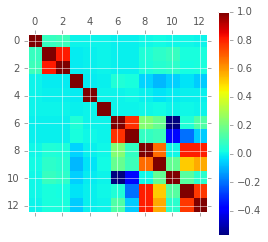

In [14]:
#print correldata
# 'index', 'rho', 'nvtx', 'Pt', 'ScEta', 'Phi', 'R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth', 'CovarianceIphiIphi', 'SigmaRR'
plt.matshow(correldata)
plt.colorbar()

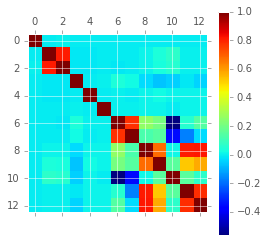

In [15]:
#print correlmcNOcorr
plt.matshow(correlmcNOcorr)
plt.colorbar()

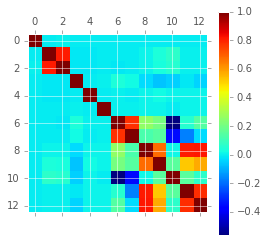

In [16]:
#print correlmccorr
plt.matshow(correlmcNOcorr)
plt.colorbar()

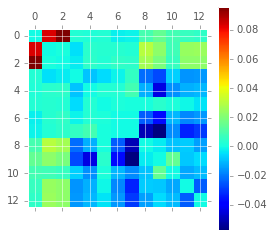

In [17]:
diffCorrelMcNOCorrData = correldata - correlmcNOcorr
#print diffCorrelMcNOCorrData
plt.matshow(diffCorrelMcNOCorrData)
plt.colorbar()

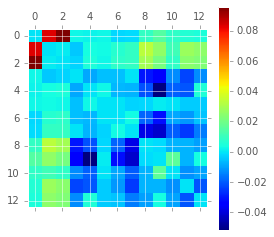

In [18]:
diffCorrelMcCorrData = correldata - correlmccorr
#print diffCorrelMcCorrData
plt.matshow(diffCorrelMcCorrData)
plt.colorbar()

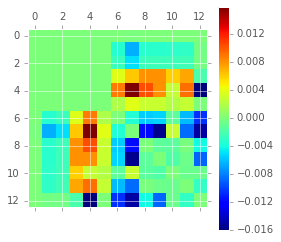

In [19]:
test = diffCorrelMcNOCorrData - diffCorrelMcCorrData
plt.matshow(test)
plt.colorbar()

The effect of the corrections (...as expected) has a very small impact.
Need to go more granular

Remember there is no data/mc reweighting done ! ...maybe not needed because we train on pt/eta/phi/rho


This is global. I need more local checks in pt/eta/phi/rho:
- [corr(mccorr)-corr(data)] vs. pt/eta/phi/rho
    With the dataframe mccorr created above and the one on data, 
    select within the dataframe a range in pt/eta/phi/rho and compute 
    [corr(mccorr)-corr(data)] 